# Residuals Demo

This is an example of how to create a residuals plot using only matplotlib. 

In [11]:
%matplotlib notebook

import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split as tts

In [4]:
data = pd.read_csv("../data/concrete.csv")
data.head()

,cement,slag,ash,water,splast,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
X = data[["cement", "slag", "ash", "water", "splast", "coarse", "fine", "age"]]
y = data["strength"]

## Residuals Plot

In [39]:
def residuals_plot(model, X, y, test_size=0.2, ax=None, seed=None, save=None):
    # Do we want tts to happen here or pass splits to func?
    X_train, X_test, y_train, y_test = tts(X, y, test_size=test_size, random_state=None)

    # Model must be unfitted!
    model.fit(X_train, y_train)
    
    # Grab y_hat to compute r2 w/o making predictions on X_test twice 
    y_hat = model.predict(X_test)
    r2 = r2_score(y_test, y_hat)
    
    # Compute the residuals
    train_residuals = y_train - model.predict(X_train)
    test_residuals = y_test - y_hat
    
    if ax is None:
        _, ax = plt.subplots(figsize=(9,6))
    
    # Draw residuals plot 
    ax.scatter(y_train, train_residuals, label="Training", alpha=0.6)
    ax.scatter(y_test, test_residuals, label="Testing", alpha=0.8)

    # Draw zero error line 
    ax.axhline(0, c='k', ls='--', lw=2)
    
    # Make figure pretty
    name = model.__class__.__name__ # note: won't work for pipelines really 
    ax.set_title("{} $R^2={:0.2f}$".format(name, r2))
    ax.legend(loc='best')
    ax.set_ylabel("Residuals ($y-\hat{y}$)")
    ax.set_xlabel("Target (y)")
    
    if save:
        plt.savefig(save)
    
    return ax

<IPython.core.display.Javascript object>


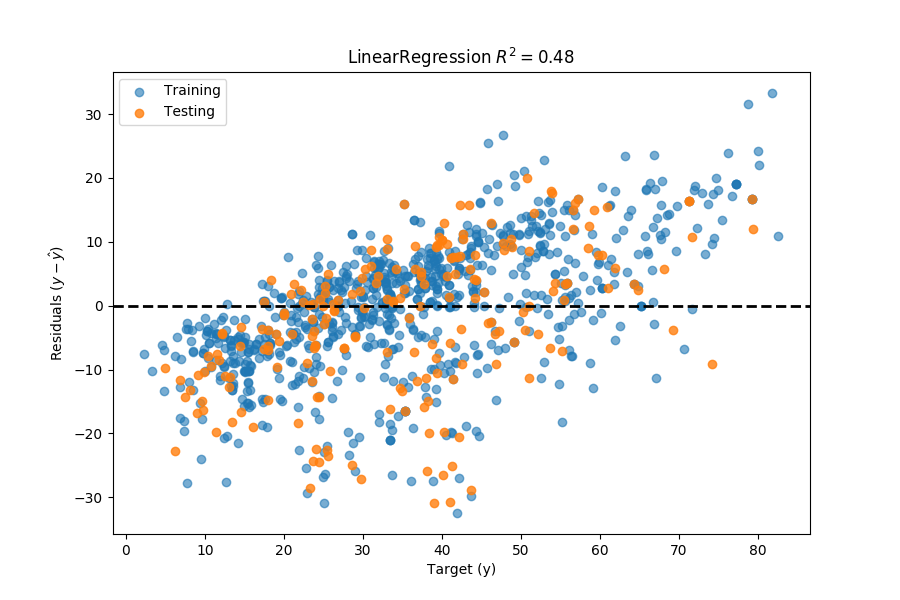

In [40]:
model = LinearRegression(fit_intercept=False)
residuals_plot(model, X, y, seed=42)

<IPython.core.display.Javascript object>


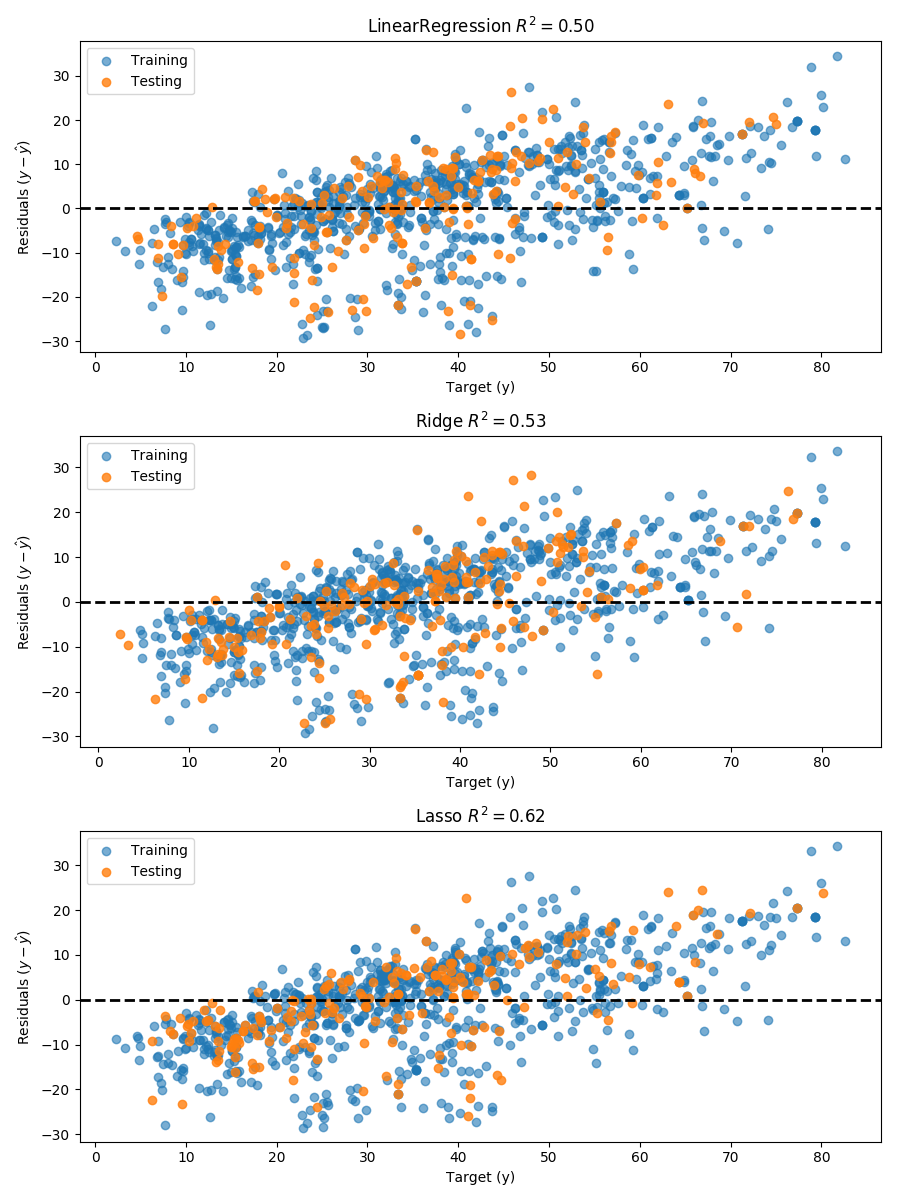

In [51]:
_, axes = plt.subplots(nrows=3, figsize=(9,12))
residuals_plot(LinearRegression(), X, y, ax=axes[0])
residuals_plot(Ridge(), X, y, ax=axes[1])
residuals_plot(Lasso(alpha=1), X, y, ax=axes[2])
plt.tight_layout()